<a href="https://colab.research.google.com/github/haiderzm/NeuralNetwithPyTorch/blob/master/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets,transforms
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#transform

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [0]:
#data

trainset = datasets.FashionMNIST(root='data',train=True,transform=transform,download=True)
testset = datasets.FashionMNIST(root='data',train=False,transform=transform,download=True)

In [0]:
#dataloader

dataloader = torch.utils.data.DataLoader(trainset,batch_size=64)
images , labels = next(iter(dataloader))

'Pullover'

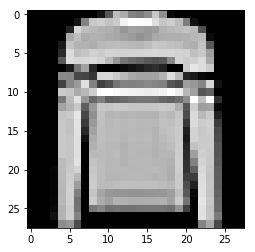

In [93]:
plt.imshow(images[5].numpy().squeeze(),cmap='gray')
classes = ['T-shirt','Pant','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
classes[labels[5]]

In [0]:
#Network

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,10)
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self,x):
        
        x = x.view(x.shape[0],-1)
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.softmax(self.fc3(x),dim=1))
        
        return x
 

In [95]:
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [0]:
#train

for i in range(100):
    
    optimizer.zero_grad()
    out = model(images)
    loss = criterion(out,labels)
    loss.backward()
    optimizer.step()

In [0]:
pr = model(images[5])

(0, 9)

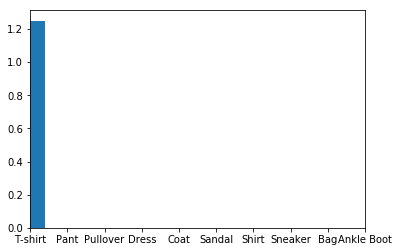

In [100]:
plt.bar(classes,pr.detach().numpy().squeeze())
plt.xlim(0,9)

In [0]:
testloader = torch.utils.data.DataLoader(testset,batch_size=64)
img,lab=next(iter(testloader))

'Pullover'

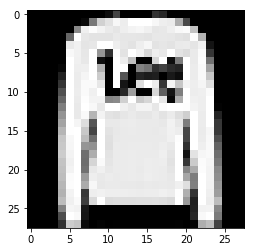

In [102]:
plt.imshow(img[1].numpy().squeeze(),cmap='gray')
classes[lab[1]]

<BarContainer object of 10 artists>

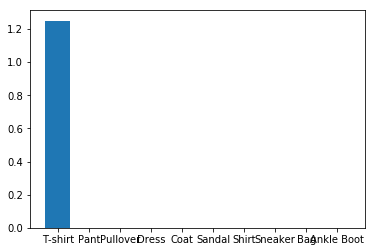

In [103]:
plt.bar(classes,model(img[1]).detach().numpy().squeeze())